In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("insurance.csv")
df = dataset

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

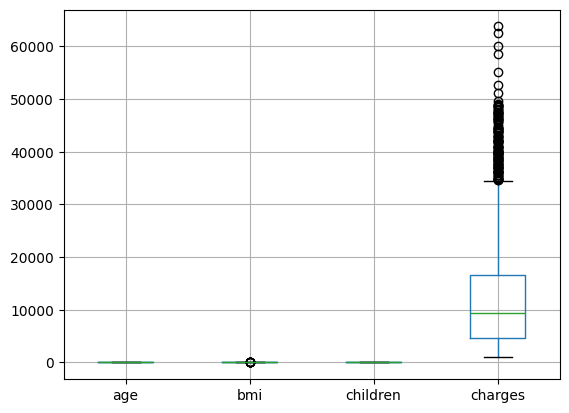

<Figure size 2000x1000 with 0 Axes>

In [5]:
df.boxplot()
plt.figure(figsize = (20, 10))
plt.show()

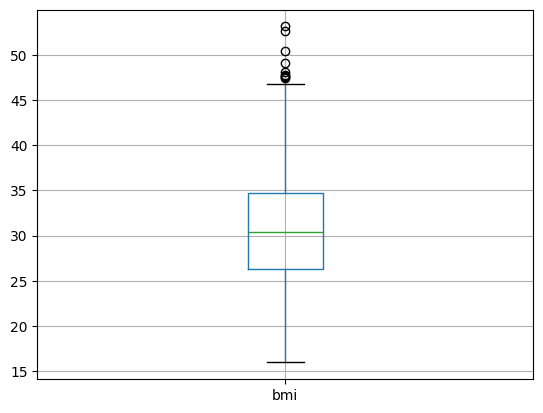

In [6]:
df.boxplot(column = "bmi")
plt.show()

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
enc = OneHotEncoder(sparse_output=False)

In [10]:
encoded = enc.fit_transform(df[["sex"]])

In [11]:
encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [12]:
encoded = pd.DataFrame(encoded)
encoded.drop(columns = 0)
encoded.rename(columns = {1:"Male"}, inplace = True)

In [13]:
encoded.drop(columns = 0, inplace = True)

In [14]:
encoded = encoded.astype("int")

In [15]:
encoded

,Male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [16]:
df2 = pd.concat([df, encoded], axis = 1)

In [17]:
df2

,age,sex,bmi,children,smoker,region,charges,Male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [18]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
encoded2 = enc.fit_transform(df[["smoker"]])

In [20]:
df3 = pd.get_dummies(df2, columns = ["smoker", "region"], drop_first = True, dtype = "int")

In [21]:
df3

,age,sex,bmi,children,charges,Male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,16884.92400,0,1,0,0,1
1,18,male,33.770,1,1725.55230,1,0,0,1,0
2,28,male,33.000,3,4449.46200,1,0,0,1,0
3,33,male,22.705,0,21984.47061,1,0,1,0,0
4,32,male,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,2007.94500,0,0,0,0,1


In [22]:
df3.drop(columns = "sex", inplace = True)

In [23]:
df3

,age,bmi,children,charges,Male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [24]:
df3.corr()

,age,bmi,children,charges,Male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
Male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


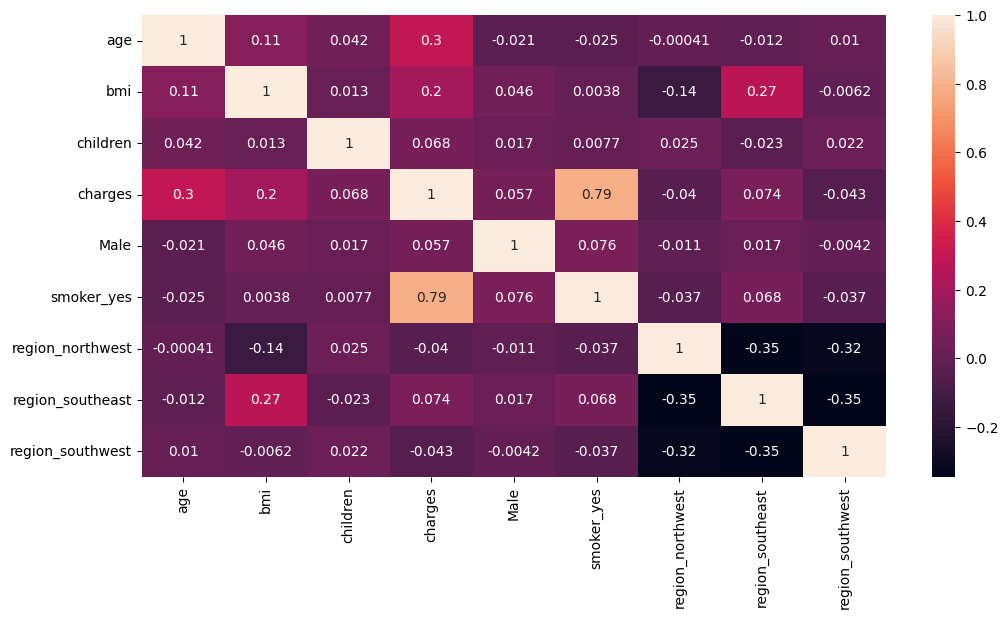

In [25]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.heatmap(df3.corr(), annot = True)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df3.drop(columns = "charges")

In [28]:
X

,age,bmi,children,Male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [29]:
y = df[["charges"]]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_norm = scaler.fit_transform(X_train)

In [35]:
X_test_norm = scaler.transform(X_test)

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linear_model = LinearRegression()

In [38]:
linear_model.fit(X_train_norm, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
linear_model.score(X_train_norm, y_train)

0.7499762962814331

In [41]:
y_pred = linear_model.predict(X_test_norm)

In [42]:
linear_model.score(X_test_norm, y_test)

0.7533074891948864

In [43]:
mean_absolute_error(y_test, y_pred)

4019.090742069351

In [44]:
mean_squared_error(y_test, y_pred)

32086608.295134652

## Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
train_scores = []
test_scores = []

for degree in range(1,11):
    poly_features = PolynomialFeatures(degree = degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train_norm)
    X_test_poly = poly_features.transform(X_test_norm)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    train_score = mean_squared_error(y_train, y_train_pred)
    train_scores.append(train_score)
    
    y_test_pred = model.predict(X_test_poly)
    test_score = mean_squared_error(y_test, y_test_pred)
    test_scores.append(test_score)


In [52]:
print(train_scores)

[37643380.3216703, 22988284.072616324, 21328070.726790413, 18426384.49057153, 13470561.80380512, 7705332.692399825, 4549772.637028628, 1575080.2046861404, 424267.07835002657, 171211.3229664803]


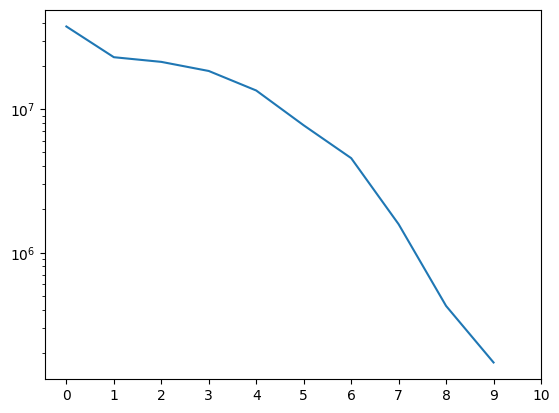

In [53]:
plt.plot(train_scores)
plt.xticks(range(0,11))
plt.yscale('log')
plt.show()

In [54]:
print(test_scores)

[32086608.295134652, 20211549.65313575, 21017903.51528471, 38709771.67363881, 344296523.3340764, 2.0923780996240955e+21, 7.879154689771132e+23, 2.0676435004433403e+25, 2.176168180375257e+23, 3.775062870434093e+20]


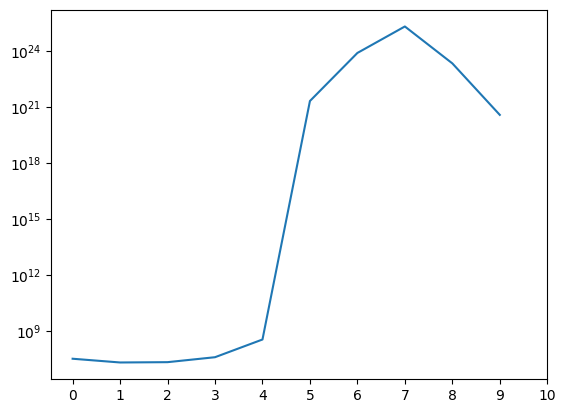

In [55]:
plt.plot(test_scores)
plt.xticks(range(11))
plt.yscale('log')
plt.show()

In [56]:
poly_features = PolynomialFeatures(degree = 5, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_norm)
X_test_poly = poly_features.transform(X_test_norm)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [57]:
model.score(X_train_poly, y_train)

0.9105298269024376

In [58]:
y_train_pred = model.predict(X_train_poly)

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_train, y_train_pred)

0.9105298269024376

In [61]:
y_test_pred = model.predict(X_test_poly)

In [64]:
r2_score(y_test, y_test_pred)  

-1.6470661224618608

In [65]:
poly_features = PolynomialFeatures(degree = 4, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_norm)
X_test_poly = poly_features.transform(X_test_norm)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [66]:
y_train_pred = model.predict(X_train_poly)
r2_score(y_train, y_train_pred)

0.8776137302998024

In [67]:
y_test_pred = model.predict(X_test_poly)
r2_score(y_test, y_test_pred)  

0.7023864074686069

In [68]:
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_norm)
X_test_poly = poly_features.transform(X_test_norm)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [69]:
y_train_pred = model.predict(X_train_poly)
r2_score(y_train, y_train_pred)

0.8583410100071727

In [70]:
y_test_pred = model.predict(X_test_poly)
r2_score(y_test, y_test_pred)  

0.8384073710018328

## Ridge Regression 

In [71]:
from sklearn.linear_model import Ridge

In [72]:
#Sample Run
ridge0 = Ridge(alpha = 1)

In [73]:
ridge0.fit(X_train_norm, y_train)

Ridge(alpha=1)

In [80]:
y_train_pred = ridge0.predict(X_train_norm)
y_train_pred #length = 1070

array([[34737.3758322 ],
       [ 5285.32989778],
       [37139.22338321],
       ...,
       [ 4837.66460807],
       [ 2803.54934039],
       [11284.52246953]])

In [75]:
r2_score(y_train, y_train_pred)

0.7499756306012181

In [79]:
y_test_pred = ridge0.predict(X_test_norm)
y_test_pred #length = 268

array([[ 5666.66848597],
       [ 1987.03662554],
       [ 9239.12441553],
       [11844.37503252],
       [ 8280.43406014],
       [ 4736.92956834],
       [ 2302.82233519],
       [  546.39768779],
       [ 9133.98389848],
       [ 1798.32110121],
       [34458.99067862],
       [30769.91173086],
       [ 7066.14825205],
       [11360.0053584 ],
       [17087.72159946],
       [13959.5866786 ],
       [29291.22240871],
       [12494.02291881],
       [32664.35837472],
       [11726.49241118],
       [10726.87877867],
       [10262.63963885],
       [26239.01383091],
       [ 9889.90135131],
       [  556.63434625],
       [ 4030.55577033],
       [36831.01368632],
       [13225.85370197],
       [40256.89113951],
       [ 5384.43871768],
       [ 1893.29109221],
       [28755.40578459],
       [ 5575.66328267],
       [ 3928.17553262],
       [15723.42506991],
       [ 5527.53457217],
       [29967.78736313],
       [10595.28089719],
       [16045.91441916],
       [ 8759.22598993],


In [81]:
r2_score(y_test, y_test_pred)

0.7533565280723147

In [83]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_train_scores = []
ridge_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train_norm, y_train)
    
    y_train_pred = ridge_model.predict(X_train_norm)
    y_test_pred = ridge_model.predict(X_test_norm)

    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)

    ridge_train_scores.append(train_score)
    ridge_test_scores.append(test_score)

In [84]:
print(ridge_train_scores)

[0.7499762962814264, 0.749976296280766, 0.7499762962147316, 0.7499762896125046, 0.7499756306012181, 0.749910921017304, 0.744462610617586, 0.577799749999528]


In [85]:
print(ridge_test_scores)

[0.7533074941802824, 0.7533075390481107, 0.7533079876536137, 0.7533124664322983, 0.7533565280723147, 0.7537259917769743, 0.7515494518743727, 0.5869526304214321]


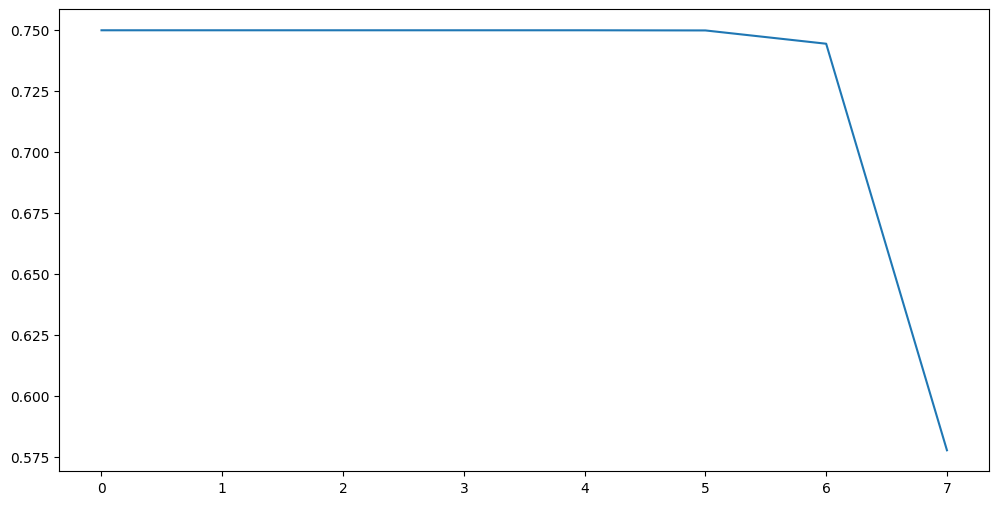

In [97]:
plt.figure(figsize = (12,6))
plt.plot(ridge_train_scores)
plt.show()

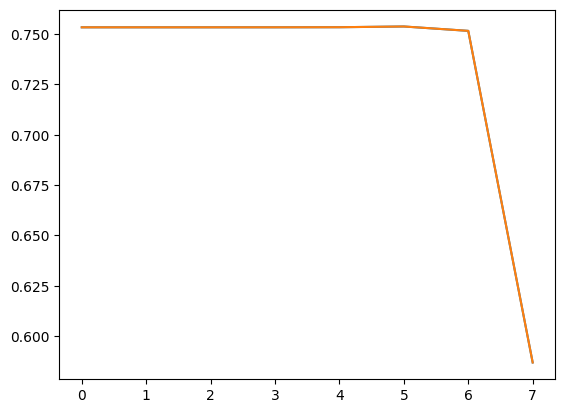

In [90]:
plt.plot(ridge_test_scores)
plt.show()

In [106]:
#Trying on alpha = 0.0001
ridge_model = Ridge(alpha = 0.0001)
ridge_model.fit(X_train_norm, y_train)

y_train_pred = ridge_model.predict(X_train_norm)
y_test_pred = ridge_model.predict(X_test_norm)

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

In [107]:
train_score

0.7499762962814264

In [108]:
test_score

0.7533074941802824

## Polynomial Ridge Regression

In [111]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
poly_ridge_train_scores = []
poly_ridge_test_scores = []

for degree in range(1,11):
    for alpha in alphas:
        poly_features = PolynomialFeatures(degree = degree)
        poly_X_train = poly_features.fit_transform(X_train_norm)
        poly_X_test = poly_features.transform(X_test_norm)

        poly_ridge = Ridge(alpha = alpha)
        poly_ridge.fit(poly_X_train, y_train)

        y_train_pred = poly_ridge.predict(poly_X_train)
        y_test_pred = poly_ridge.predict(poly_X_test)

        train_score = r2_score(y_train, y_train_pred)
        test_score = r2_score(y_test, y_test_pred)

        poly_ridge_train_scores.append(train_score)
        poly_ridge_test_scores.append(test_score)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.89489e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


In [123]:
poly_ridge_train_scores

[0.7499762962814264,
 0.7499762962807659,
 0.7499762962147316,
 0.7499762896125046,
 0.749975630601218,
 0.749910921017304,
 0.744462610617586,
 0.577799749999528,
 0.8473196722377742,
 0.8473196722374827,
 0.8473196722083363,
 0.8473196692943745,
 0.8473193785770206,
 0.8472909648421023,
 0.8449579740895227,
 0.7645001151509383,
 0.858341566662325,
 0.8583415666622116,
 0.8583415666508722,
 0.8583415655175103,
 0.8583414527513384,
 0.8583307158540712,
 0.8576039436486267,
 0.8412971411957206,
 0.8779286105998806,
 0.8779286105990338,
 0.8779286105143864,
 0.8779286020689251,
 0.877927776406315,
 0.8778607365248722,
 0.8759134511572296,
 0.8649823458355139,
 0.9123642068394248,
 0.9123642067724567,
 0.9123642000993716,
 0.9123635561286237,
 0.9123155221962569,
 0.9109924496265548,
 0.9026597399002021,
 0.8839768001366406,
 0.9488212533589077,
 0.9487806298118616,
 0.9483045384850838,
 0.9474272170677382,
 0.9450335337433338,
 0.9379322638473965,
 0.9237332409533239,
 0.9016430484305789

In [113]:
poly_ridge_test_scores

[0.7533074941802824,
 0.7533075390481105,
 0.7533079876536137,
 0.7533124664322982,
 0.7533565280723147,
 0.7537259917769742,
 0.7515494518743726,
 0.5869526304214321,
 0.8446610599751088,
 0.8446611155225034,
 0.8446616709474004,
 0.8446672202929383,
 0.8447222250180166,
 0.8452249519944742,
 0.8466517227822421,
 0.7718325907300032,
 0.8384440121989005,
 0.8384440383291586,
 0.8384442996172095,
 0.8384469110456138,
 0.8384728808886864,
 0.8387188612361521,
 0.8402616338443537,
 0.8347793892233686,
 0.6995566931610449,
 0.6995583616423886,
 0.6995750440032147,
 0.6997416227450083,
 0.7013833042657889,
 0.7157155173937844,
 0.7756905818854918,
 0.8254653156943612,
 -1.9492441191582635,
 -1.9492798874629327,
 -1.9496267581705293,
 -1.9521383782032649,
 -1.9099601759855815,
 -0.8723076091385109,
 0.5536334633593123,
 0.8099189455517358,
 -1134.772102395843,
 -984.4172497389262,
 -936.4601379554294,
 -751.6024581292206,
 -308.30486093822856,
 -37.41388933742671,
 -0.9982725802014705,
 0.66

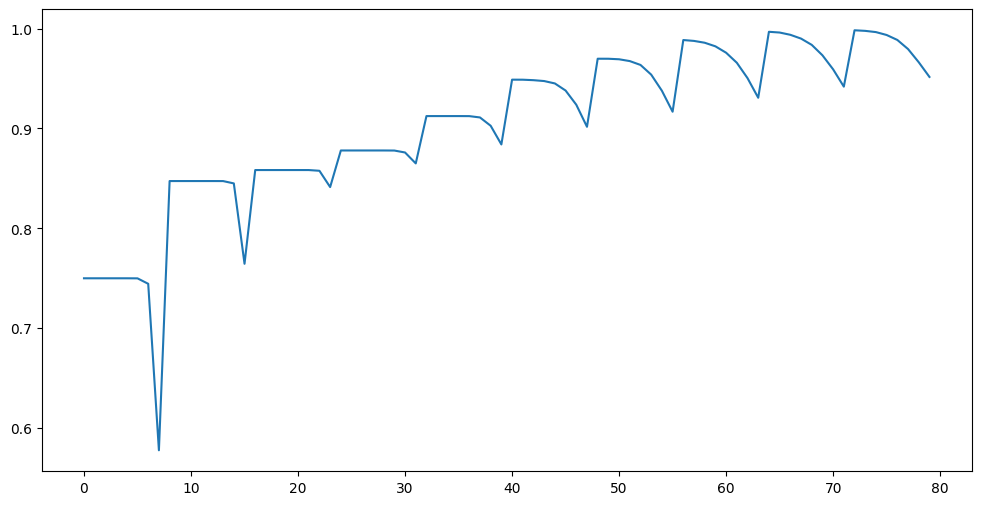

In [116]:
plt.figure(figsize = (12,6))
plt.plot(poly_ridge_train_scores)
plt.show()

In [118]:
max(poly_ridge_test_scores)

0.8466517227822421

In [119]:
min(poly_ridge_test_scores)

-28755467.48475761

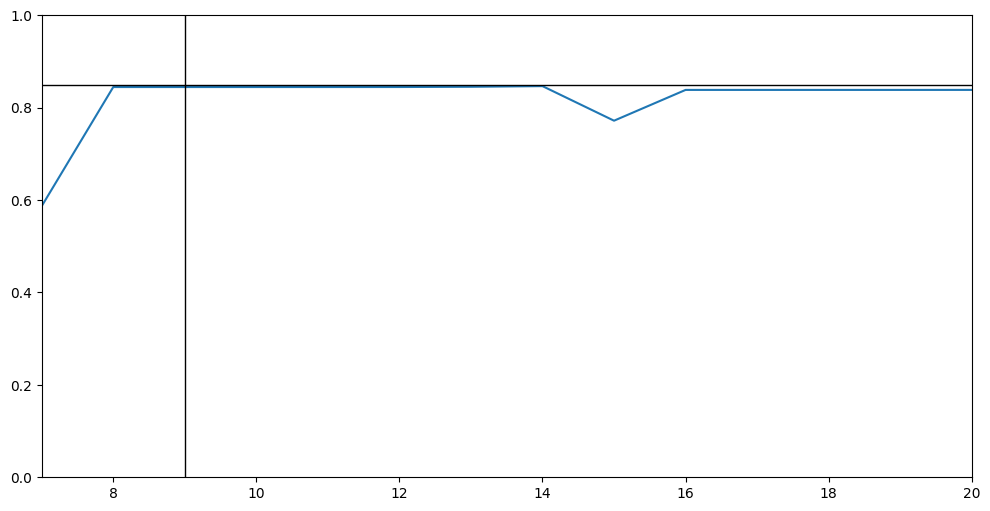

In [135]:
plt.figure(figsize = (12,6))
plt.plot(poly_ridge_test_scores)
#plt.yscale("log")
plt.ylim(0,1)
plt.xlim(7, 20)
plt.axvline(x=9, color='black', linewidth=1)
plt.axhline(y=0.85, color='black', linewidth=1)
plt.show()

In [133]:
max(poly_ridge_test_scores)

0.8466517227822421

In [136]:
poly_ridge_test_scores[9]

0.8446611155225034

In [137]:
poly_ridge_train_scores[9]

0.8473196722374827

In [139]:
#Finalizing degree = 2 and alpha = 0.001
poly_features = PolynomialFeatures(degree = 2)
poly_X_train = poly_features.fit_transform(X_train_norm)
poly_X_test = poly_features.transform(X_test_norm)

poly_ridge = Ridge(alpha = 0.001)
poly_ridge.fit(poly_X_train, y_train)

y_train_pred = poly_ridge.predict(poly_X_train)
y_test_pred = poly_ridge.predict(poly_X_test)

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("Train Score : ", train_score)
print("Test Score : ", test_score)

Train Score :  0.8473196722374827
Test Score :  0.8446611155225034


## Lasso Regression 

In [140]:
from sklearn.linear_model import Lasso

In [142]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lasso_train_scores = []
lasso_test_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha)
    lasso_model.fit(X_train_norm, y_train)
    
    y_train_pred = lasso_model.predict(X_train_norm)
    y_test_pred = lasso_model.predict(X_test_norm)

    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)

    lasso_train_scores.append(train_score)
    lasso_test_scores.append(test_score)

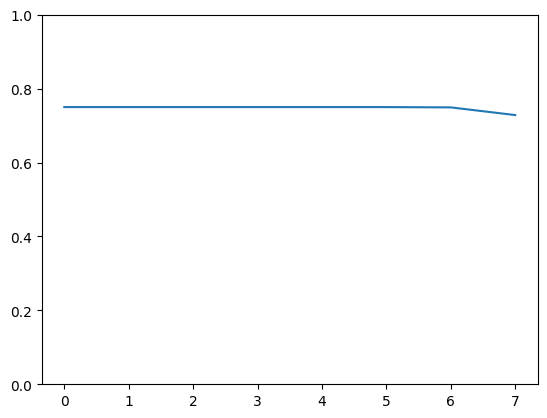

In [146]:
plt.plot(lasso_train_scores)
plt.ylim(0,1)
plt.show()

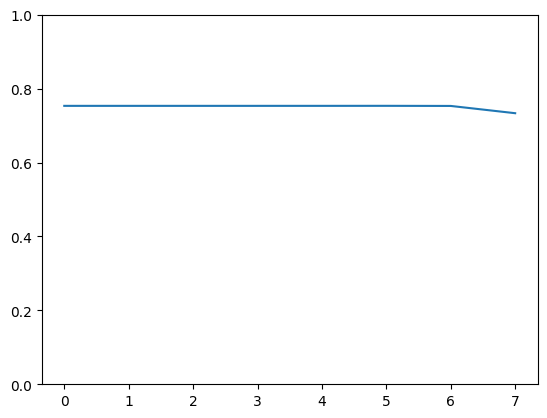

In [145]:
plt.plot(lasso_test_scores)
plt.ylim(0,1)
plt.show()

## Polynomial Lasso Regression (PC gave up!)

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
poly_lasso_train_scores = []
poly_lasso_test_scores = []

for degree in range(1,11):
    for alpha in alphas:
        poly_features = PolynomialFeatures(degree = degree)
        poly_X_train = poly_features.fit_transform(X_train_norm)
        poly_X_test = poly_features.transform(X_test_norm)

        poly_lasso = Lasso(alpha = alpha, max_iter = 10000)
        poly_lasso.fit(poly_X_train, y_train)

        y_train_pred = poly_lasso.predict(poly_X_train)
        y_test_pred = poly_lasso.predict(poly_X_test)

        train_score = r2_score(y_train, y_train_pred)
        test_score = r2_score(y_test, y_test_pred)

        poly_lasso_train_scores.append(train_score)
        poly_lasso_test_scores.append(test_score)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+10, tolerance: 1.611e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.619e+08, tolerance: 1.611e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

## Elastic Net

In [151]:
from sklearn.linear_model import ElasticNet

In [154]:
elastic_model = ElasticNet(alpha = 0.001, l1_ratio = 0.5)
elastic_model.fit(X_train_norm, y_train)
y_train_pred = elastic_model.predict(X_train_norm)
y_test_pred = elastic_model.predict(X_test_norm)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

In [155]:
train_score

0.7499761054970618

In [156]:
test_score

0.7533339326530115

## Polynomial Elastic Net

In [158]:
poly_features = PolynomialFeatures(degree = 2)
poly_X_train = poly_features.fit_transform(X_train_norm)
poly_X_test = poly_features.transform(X_test_norm)

poly_elastic = ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter = 10000)
poly_elastic.fit(poly_X_train, y_train)

y_train_pred = poly_elastic.predict(poly_X_train)
y_test_pred = poly_elastic.predict(poly_X_test)

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.551e+09, tolerance: 1.611e+07
  model = cd_fast.enet_coordinate_descent(


In [159]:
train_score

0.8473195879911104

In [160]:
test_score

0.8446939840008827